

```
You will anaylize a dataset of the global average sea level change since 1880. You will use the data to predict the sea level change through year 2050.

Use the data to complete the following tasks:
* Use Pandas to import the data from `epa-sea-level.csv`.
* Use matplotlib to create a scatter plot using the "Year" column as the x-axis and the "CSIRO Adjusted Sea Level" column as the y-axix.
* Use the `linregress` function from `scipi.stats` to get the slope and y-intercept of the line of best fit. Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.
* Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.
* The x label should be "Year", the y label should be "Sea Level (inches)", and the title should be "Rise in Sea Level".

```



In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [54]:
# Read data from file
df = pd.read_csv('sample_data/epa-sea-level.csv')

In [55]:
print(df.shape)
df.dtypes

(134, 5)


Year                          int64
CSIRO Adjusted Sea Level    float64
Lower Error Bound           float64
Upper Error Bound           float64
NOAA Adjusted Sea Level     float64
dtype: object

In [56]:
df.head(4)

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN


In [57]:
# lets check for which rows NOAA Adjusted Sea Level is given
df[~df['NOAA Adjusted Sea Level'].isna()].head(5)


,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
113,1993,6.291339,6.027559,6.555118,6.297493
114,1994,6.500000,6.236220,6.763780,6.310934
115,1995,6.618110,6.354331,6.881890,6.452569
116,1996,6.787402,6.523622,7.051181,6.627631
117,1997,7.066929,6.803150,7.330709,6.733920


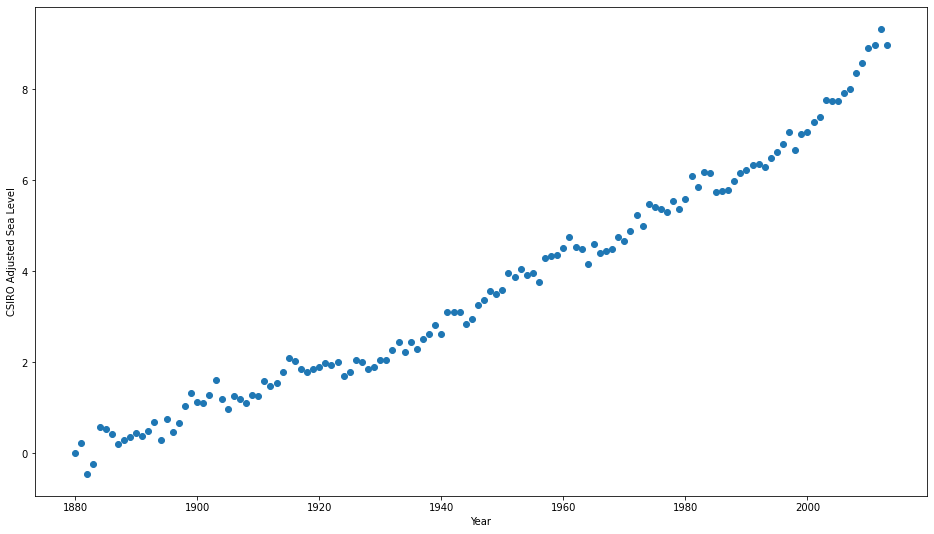

In [58]:
# Create scatter plot
# Use matplotlib to create a scatter plot using the "Year" column as the x-axis and the "CSIRO Adjusted Sea Level" column as the y-axix.
x = df.Year
y = df.loc[:,'CSIRO Adjusted Sea Level']

plt.scatter(x,y)
plt.xlabel('Year')
plt.ylabel('CSIRO Adjusted Sea Level')
fig = plt.gcf()
fig.set_size_inches(16,9)
fig.set_alpha(0.5)

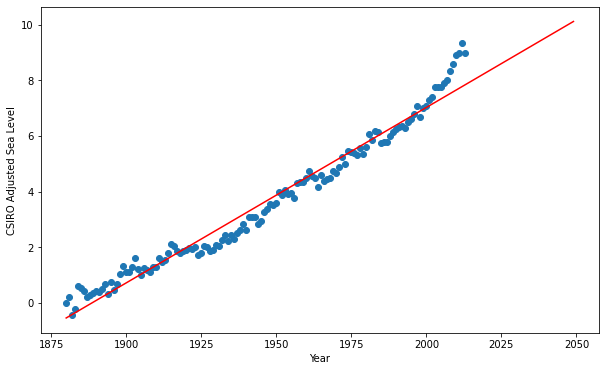

In [59]:
# Use the linregress function from scipi.stats to get the slope and y-intercept of the line of best fit.
# Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.

m, c, r_value, p_value, std_err = linregress(x, y)

# Populating X coordinates
ln_x = np.arange(x.min(),2050)

# Populating  Y coordinates => Y = mx + c
ln_y = m *ln_x + c

plt.scatter(x,y)
plt.plot(ln_x, ln_y,'r')

plt.xlabel('Year')
plt.ylabel('CSIRO Adjusted Sea Level')
fig = plt.gcf()
fig.set_size_inches(10,6)
fig.set_alpha(0.5)





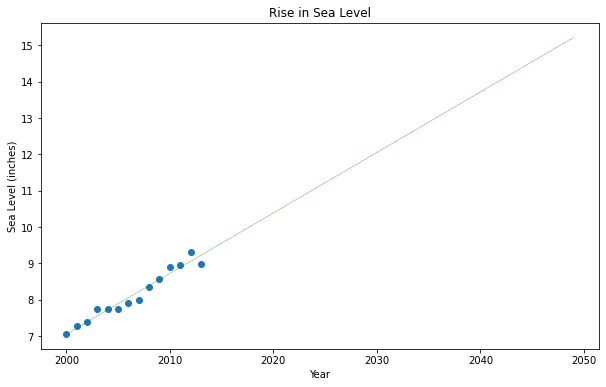

In [60]:
# Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset.
# Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.
# The x label should be "Year", the y label should be "Sea Level (inches)", and the title should be "Rise in Sea Level".


requiredDF = df.loc[df.Year >= 2000,['Year','CSIRO Adjusted Sea Level']]

x1 = requiredDF.loc[:,'Year']
y1 = requiredDF.loc[:,'CSIRO Adjusted Sea Level']

# Getting new slope and y-intercept (c)
m1, c1 ,r1_value, p1_value, std_err1 = linregress(x1, y1)

ln_x1 = np.arange(x1.min(),2050)
ln_y1 = m1 * ln_x1 + c1

#plotting with new Data
plt.scatter(x1,y1,)
plt.plot(ln_x1,ln_y1,'g',lw=0.3)

plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Rise in Sea Level')
fig = plt.gcf()
fig.set_size_inches(10,6)
fig.set_alpha(0.5)

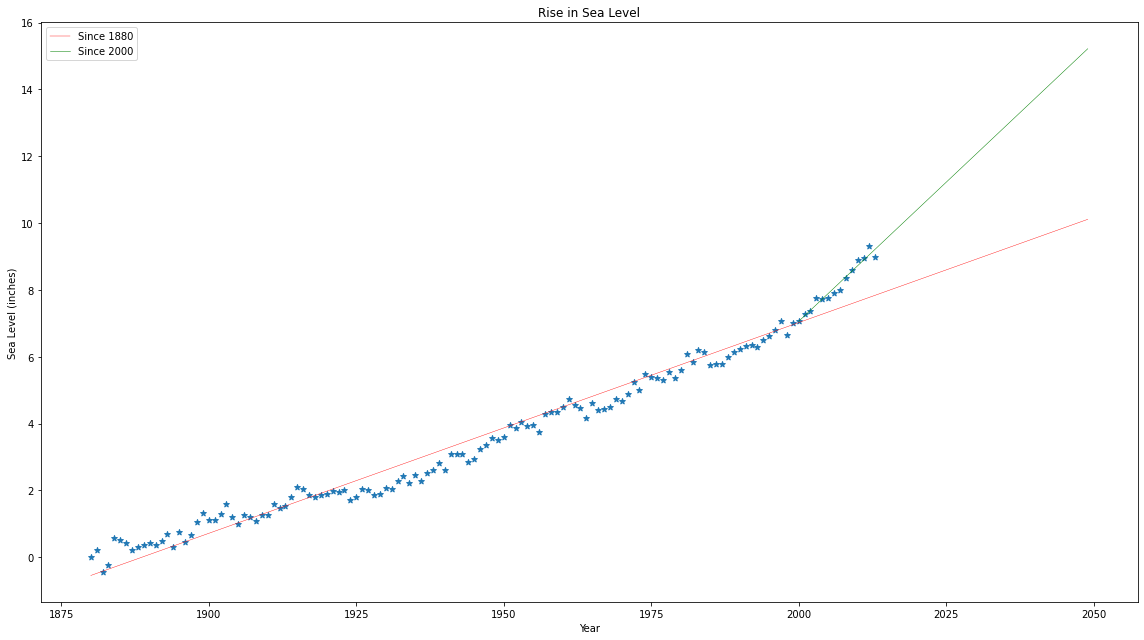

In [63]:
### Accorting to the assignment :

plt.scatter(x,y,marker='*')
plt.plot(ln_x,ln_y,'r',lw = .4,label = "Since 1880")
plt.plot(ln_x1,ln_y1,'g',lw = .5,label="Since 2000")
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Rise in Sea Level')
fig = plt.gcf()
fig.set_size_inches(16,9)
plt.legend(loc="upper left")
plt.show()



